# Twitter Bot Detection Tool

In [1]:
import pandas as pd 
# Used for data manipulation and analysis
import numpy as np
# Numerical Python, for mathematical operations
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
filepath = '/Users/izzy/Documents/twitter-bot-detection-master/kaggle_data/'
file = filepath+'training_data_2_csv_UTF.csv'
# Get dataset from local path
training_data = pd.read_csv(file)
# Read it using pandas csv read function
bots = training_data[training_data.bot==1]
humanacc = training_data[training_data.bot==0]

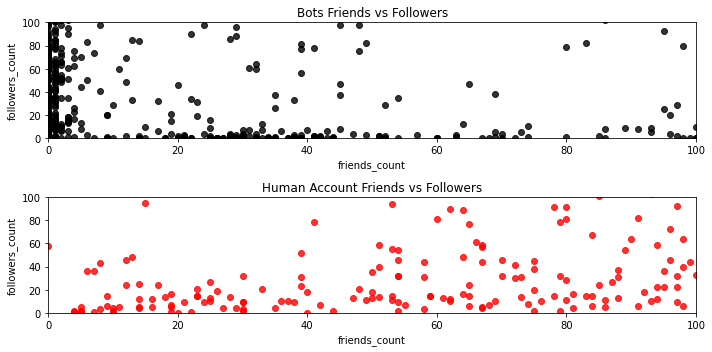

In [3]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
# Plots friends and followers list of bots 

plt.subplot(2,1,2)
plt.title('Human Account Friends vs Followers')
sns.regplot(humanacc.friends_count, humanacc.followers_count, color='red', label='Human')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

Summary:

~ Most bot accounts that have zero followers have a large 'following' count

~ Most human accounts have a balanced ratio of followers to following compared to Bot Accounts

In [4]:
filepath = '/Users/izzy/Documents/twitter-bot-detection-master/kaggle_data/'
file = open(filepath+'training_data_2_csv_UTF.csv', mode='r', encoding='utf-8', errors = 'ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bdsm|butt|fuck|XXX|sex|truth|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|vaccine|yeah|bio|magic|wizard|face'

training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [5]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

In [6]:
#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

# Split data into x and y variables 
x = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

#Make an instance of the DT model
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

# Split x and y data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Call the Decision Tree classifier model and fit into our training dataset
dt = dt.fit(x_train, y_train)

# Make prediction for the test data using .predict
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Split data into x and y variables 
x = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

# Split x and y data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

# Call the Random Forest classifier model and fit into our training dataset
rf = rf.fit(x_train, y_train)

# Make prediction for the test data using .predict
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)


In [8]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

# Split data into x and y variables 
x = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

# Split x and y data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

# Call the XGB classifier model and fit into our training dataset
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

# Make prediction for the test data using .predict
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Choose a Classifier Model diagram to view:

In [9]:
import ipywidgets as widgets

model = widgets.Select(
    options=['Decision Tree', 'Random Forest', 'XGBoost'],
    value='XGBoost',
    description='Models:',
    disabled=False
)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot


def show_models(model):
    fn= ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']
    # call all the features used in feature extraction to be displayed
    cn = ['bots','humanacc']
    
    
    #fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    
    if model=="Decision Tree":
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
        tree.plot_tree(dt,
        feature_names = fn, 
        class_names=cn,
        filled = False);
    elif model=="Random Forest":
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
        tree.plot_tree(rf.estimators_[0],
        feature_names = fn, 
        class_names=cn,
        filled = True);
    elif model=="XGBoost":
        txgb = plot_tree(xgb)
        fig = pyplot.gcf() 
        fig.set_size_inches(200, 150) # increases resolution of diagram
        pyplot.show()

In [11]:
widgets.interactive(show_models, model = model)

interactive(children=(Select(description='Models:', index=2, options=('Decision Tree', 'Random Forest', 'XGBoo…

# Feature Importance Tables

 These tables show us which variables each Machine Learning algorithm prioritises when detecting bot accounts.

# Decision Tree

In [12]:
# Use feature importance to identify the variables with the most importance for the decision tree classifier
pd.DataFrame({'Variable':x,
              'Importance':dt.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,"(v, e, r, i, f, i, e, d)",0.384416
6,"(f, r, i, e, n, d, s, _, c, o, u, n, t)",0.325815
5,"(f, o, l, l, o, w, e, r, s, _, c, o, u, n, t)",0.116964
7,"(s, t, a, t, u, s, e, s, _, c, o, u, n, t)",0.089948
1,"(n, a, m, e, _, b, i, n, a, r, y)",0.069619
3,"(s, t, a, t, u, s, _, b, i, n, a, r, y)",0.013239
0,"(s, c, r, e, e, n, _, n, a, m, e, _, b, i, n, ...",0.000000
2,"(d, e, s, c, r, i, p, t, i, o, n, _, b, i, n, ...",0.000000
8,"(l, i, s, t, e, d, _, c, o, u, n, t, _, b, i, ...",0.000000


# Random Forest

In [13]:
# Use feature importance to identify the variables with the most importance for the random forest classifier
pd.DataFrame({'Variable':x,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
6,"(f, r, i, e, n, d, s, _, c, o, u, n, t)",0.337060
4,"(v, e, r, i, f, i, e, d)",0.231961
5,"(f, o, l, l, o, w, e, r, s, _, c, o, u, n, t)",0.201486
2,"(d, e, s, c, r, i, p, t, i, o, n, _, b, i, n, ...",0.067402
1,"(n, a, m, e, _, b, i, n, a, r, y)",0.060549
0,"(s, c, r, e, e, n, _, n, a, m, e, _, b, i, n, ...",0.058197
7,"(s, t, a, t, u, s, e, s, _, c, o, u, n, t)",0.036925
3,"(s, t, a, t, u, s, _, b, i, n, a, r, y)",0.006422
8,"(l, i, s, t, e, d, _, c, o, u, n, t, _, b, i, ...",0.000000


# XGBoost

In [14]:
# Use feature importance to identify the variables with the most importance for the XGBoost classifier
pd.DataFrame({'Variable':x,
              'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,"(v, e, r, i, f, i, e, d)",0.525149
1,"(n, a, m, e, _, b, i, n, a, r, y)",0.185838
6,"(f, r, i, e, n, d, s, _, c, o, u, n, t)",0.076268
0,"(s, c, r, e, e, n, _, n, a, m, e, _, b, i, n, ...",0.072926
2,"(d, e, s, c, r, i, p, t, i, o, n, _, b, i, n, ...",0.047231
5,"(f, o, l, l, o, w, e, r, s, _, c, o, u, n, t)",0.040930
3,"(s, t, a, t, u, s, _, b, i, n, a, r, y)",0.026760
7,"(s, t, a, t, u, s, e, s, _, c, o, u, n, t)",0.024898
8,"(l, i, s, t, e, d, _, c, o, u, n, t, _, b, i, ...",0.000000
